In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = pd.read_csv("C:/Users/bhoom/Downloads/predictive_maintenance.csv")

In [3]:
print("The data : ")
print(x.head())
print(x.columns)
print(len(x.columns))

The data : 
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temper

In [4]:
print(x['Failure Type'].value_counts())
print(len(x))

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
10000


In [5]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
print(x.columns)

ordinal_cols = ['Type']
x_ordinal = x[ordinal_cols]
x_ordinal = ordinal_encoder.fit_transform(x_ordinal)
x_ordinal = pd.DataFrame(x_ordinal, columns = ordinal_cols)
print(x_ordinal.head())
x.drop(ordinal_cols,axis=1,inplace=True)

x[ordinal_cols] = x_ordinal[ordinal_cols]
print(x.head())

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')
   Type
0   2.0
1   1.0
2   1.0
3   1.0
4   1.0
   UDI Product ID  Air temperature [K]  Process temperature [K]  \
0    1     M14860                298.1                    308.6   
1    2     L47181                298.2                    308.7   
2    3     L47182                298.1                    308.5   
3    4     L47183                298.2                    308.6   
4    5     L47184                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  \
0                    1551         42.8                0       0   No Failure   
1                    1408         46.3                3       0   No Failure   
2                    1498         49.4                5       0   No Failure   
3                   

In [6]:
x.drop(['UDI','Product ID','Failure Type'],axis=1,inplace=True)

In [7]:
y = x['Target']
x.drop(['Target'],axis=1,inplace=True)
print(x.head())
print(y.head())

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Type  
0         42.8                0   2.0  
1         46.3                3   1.0  
2         49.4                5   1.0  
3         39.5                7   1.0  
4         40.0                9   1.0  
0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64


In [8]:
# scaling x here 
#Importing the ROBUST SCALER

from sklearn.preprocessing import RobustScaler
print(x.head())
# Using the robust scaler 
robust_scaler_1 = RobustScaler()
x = robust_scaler_1.fit_transform(x)
x = pd.DataFrame(x)

#After scaling data be like 
print(x.head())

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Type  
0         42.8                0   2.0  
1         46.3                3   1.0  
2         49.4                5   1.0  
3         39.5                7   1.0  
4         40.0                9   1.0  
         0         1         2         3         4    5
0 -0.62500 -0.652174  0.253968  0.198529 -0.990826  1.0
1 -0.59375 -0.608696 -0.502646  0.455882 -0.963303  0.0
2 -0.62500 -0.695652 -0.026455  0.683824 -0.944954  0.0
3 -0.59375 -0.652174 -0.370370 -0.044118 -0.926606  0.0
4 -0.59375 -0.608696 -0.50264

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2,random_state=0)

In [10]:
x_train['Target'] = y_train 

x_train_non_anomaly = x_train.loc[x_train['Target']==0]
x_train_anomaly = x_train.loc[x_train['Target']==1]

x_train.drop(['Target'],axis=1,inplace=True)
x_train_non_anomaly.drop(['Target'],axis=1,inplace=True)
x_train_anomaly.drop(['Target'],axis=1,inplace=True)

print(x_train_non_anomaly)

            0         1         2         3         4    5
7389 -0.09375  0.217391  1.079365 -0.558824  0.146789  0.0
9275 -0.59375 -0.608696  0.539683 -0.786765 -0.559633  0.0
2995  0.12500 -0.130435  0.248677 -0.198529  0.366972  0.0
5316  1.09375  1.173913  0.984127 -0.514706 -0.844037  1.0
356  -0.78125 -0.739130 -0.555556  0.647059 -0.412844  1.0
...       ...       ...       ...       ...       ...  ...
9225 -0.65625 -0.434783  1.677249 -1.213235  0.110092  0.0
4859  1.12500  1.000000  0.169312 -0.110294 -0.009174  0.0
3264  0.37500  0.000000 -0.253968  0.294118  0.733945 -1.0
9845 -0.56250 -0.434783 -0.433862  0.536765 -0.688073  0.0
2732 -0.12500 -0.391304 -0.830688  1.272059  0.275229  0.0

[7736 rows x 6 columns]


C:\Users\bhoom\AppData\Local\Temp\ipykernel_5432\2773324523.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_non_anomaly.drop(['Target'],axis=1,inplace=True)
C:\Users\bhoom\AppData\Local\Temp\ipykernel_5432\2773324523.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_anomaly.drop(['Target'],axis=1,inplace=True)


In [11]:
model_mean = np.mean(x_train_non_anomaly, axis=0)
model_cov = np.cov(x_train_non_anomaly, rowvar=0)
print(model_mean)
print(model_cov)
# model_mean_anomaly = np.mean(X_train_anomaly, axis=0)
# model_cov_anomaly = np.cov(X_train_anomaly, rowvar=0)
# print(model_mean_anomaly)
# print(model_cov_anomaly)

0   -0.044068
1   -0.050228
2    0.196877
3   -0.035302
4   -0.018685
5    0.201396
dtype: float64
[[ 0.39112389  0.35830612  0.01782564 -0.01225468  0.00502206  0.00695309]
 [ 0.35830612  0.42348947  0.01420997 -0.00951814  0.00531966  0.00553597]
 [ 0.01782564  0.01420997  0.78474163 -0.54727231  0.00797626 -0.0026121 ]
 [-0.01225468 -0.00951814 -0.54727231  0.48442063 -0.00924472  0.00189366]
 [ 0.00502206  0.00531966  0.00797626 -0.00924472  0.33473396  0.00455359]
 [ 0.00695309  0.00553597 -0.0026121   0.00189366  0.00455359  0.36460568]]


C:\Users\bhoom\AppData\Local\Temp\ipykernel_5432\2162543038.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=preds_x_non_anomaly, shade=True)
C:\Users\bhoom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


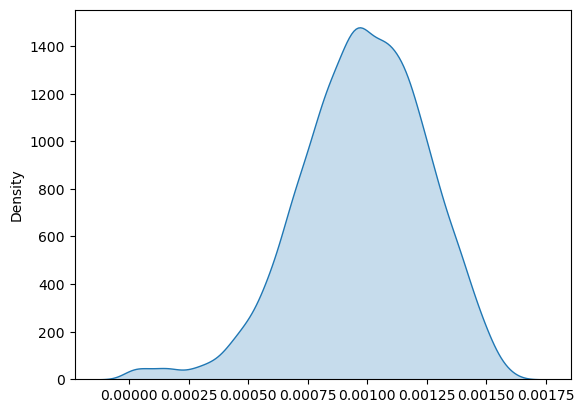

C:\Users\bhoom\AppData\Local\Temp\ipykernel_5432\2162543038.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=preds_x_anomaly, shade=True)
C:\Users\bhoom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


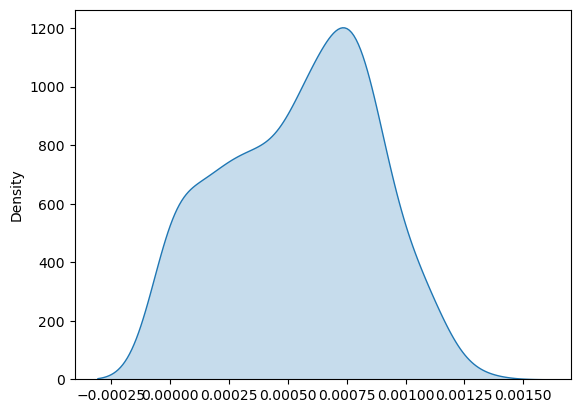

C:\Users\bhoom\AppData\Local\Temp\ipykernel_5432\2162543038.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=preds_x_non_anomaly, shade=True)
C:\Users\bhoom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhoom\AppData\Local\Temp\ipykernel_5432\2162543038.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=preds_x_anomaly, shade=True)
C:\Users\bhoom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

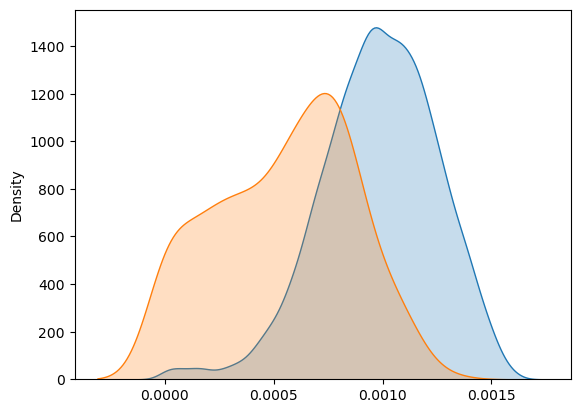

In [12]:
from scipy.stats import multivariate_normal

preds_x_non_anomaly = multivariate_normal.pdf(x_train_non_anomaly, mean=model_mean, cov=model_cov*5)# - multivariate_normal.pdf(X_train_non_anomaly, mean=model_mean_anomaly, cov=model_cov_anomaly*5)
preds_x_anomaly = multivariate_normal.pdf(x_train_anomaly, mean=model_mean, cov=model_cov*5) #- multivariate_normal.pdf(X_train_anomaly, mean=model_mean_anomaly, cov=model_cov_anomaly*5)

# X_train_anomaly
# print(preds_x_non_anomaly)
# print("-------------------")
# print(preds_x_anomaly)
# print("------------")

sns.kdeplot(data=preds_x_non_anomaly, shade=True)
plt.show()
sns.kdeplot(data=preds_x_anomaly, shade=True)
plt.show()
sns.kdeplot(data=preds_x_non_anomaly, shade=True)
sns.kdeplot(data=preds_x_anomaly, shade=True)
plt.show()

# sns.scatterplot(x=preds_x_non_anomaly, y=(preds_x_non_anomaly<100))
# sns.scatterplot(x=preds_x_anomaly, y=(preds_x_anomaly<100))
# plt.show()

# sns.scatterplot(x=preds_x_anomaly, y=(preds_x_anomaly<100))
# sns.scatterplot(x=preds_x_non_anomaly, y=(preds_x_non_anomaly<100))
# plt.show()

In [15]:
threshold = 0.001
threshold2 = 0.004
threshold_3 = 0.0008
preds_x_train = multivariate_normal.pdf(x_train, mean=model_mean, cov=model_cov*5)<threshold_3
preds_x_test = multivariate_normal.pdf(x_test, mean=model_mean, cov=model_cov*5)<threshold_3

In [16]:
from sklearn.metrics import confusion_matrix

conf_matrix_test = confusion_matrix(y_true=y_train, y_pred=preds_x_train)

print("Train result confusion matrix is :")
print(conf_matrix_test)

precision_test = ((conf_matrix_test[0][0])/(conf_matrix_test[0][1]+conf_matrix_test[0][0]))
print("Precision :"+str(precision_test))

recall_test = ((conf_matrix_test[0][0])/(conf_matrix_test[1][0]+conf_matrix_test[0][0]))
print("Recall :"+str(recall_test))

beta = 1
f1_score_test = ((1+(beta**2))/ ( (1/precision_test) + (beta**2/recall_test) ))
print("f1_score_test : "+str(f1_score_test))

Train result confusion matrix is :
[[5922 1814]
 [  65  199]]
Precision :0.765511892450879
Recall :0.9891431434775346
f1_score_test : 0.8630765867521678
